# Data visualization for extracted features

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew

Load CSV and drop non numeric columns

In [102]:
def change_difficulty(num):
  match num:
    case 1:
      return 1
    case 1.5:
      return 1
    case 2:
      return 2
    case 2.5:
      return 2
    case 3:
      return 3
    case 3.5:
      return 4
    case 4:
      return 4
    case 4.5:
      return 5
    case 5:
      return 5
    
# Keep only numeric columns
df = pd.read_csv('merged.csv')
df = df.drop(columns=['file'])
df['difficulty'] = df['difficulty'].apply(change_difficulty)

## Get information about the data

In [103]:
print(df.describe())

       difficulty  average_tempo  average_bpm    note_count    tick_count  \
count  212.000000   2.120000e+02   212.000000    212.000000  2.120000e+02   
mean     2.853774   5.817316e+05   116.136997   5408.882075  2.704661e+05   
std      1.377660   2.507059e+05    35.126231   5891.546660  3.226727e+05   
min      1.000000   2.418231e+05    31.000113    220.000000  1.680000e+03   
25%      2.000000   4.581922e+05    99.693846   1723.000000  5.116800e+04   
50%      3.000000   5.000000e+05   120.000000   3966.000000  1.342800e+05   
75%      4.000000   6.018597e+05   130.949406   7360.000000  3.402000e+05   
max      5.000000   1.935477e+06   248.115244  66008.000000  1.593600e+06   

       note_density  tempo_deviation  unique_note_count  total_duration  \
count    212.000000       212.000000         212.000000    2.120000e+02   
mean       0.044595    101708.034854          53.476415    1.105609e+06   
std        0.053805    145599.809170          13.450432    1.756872e+06   
min   

Get correlation

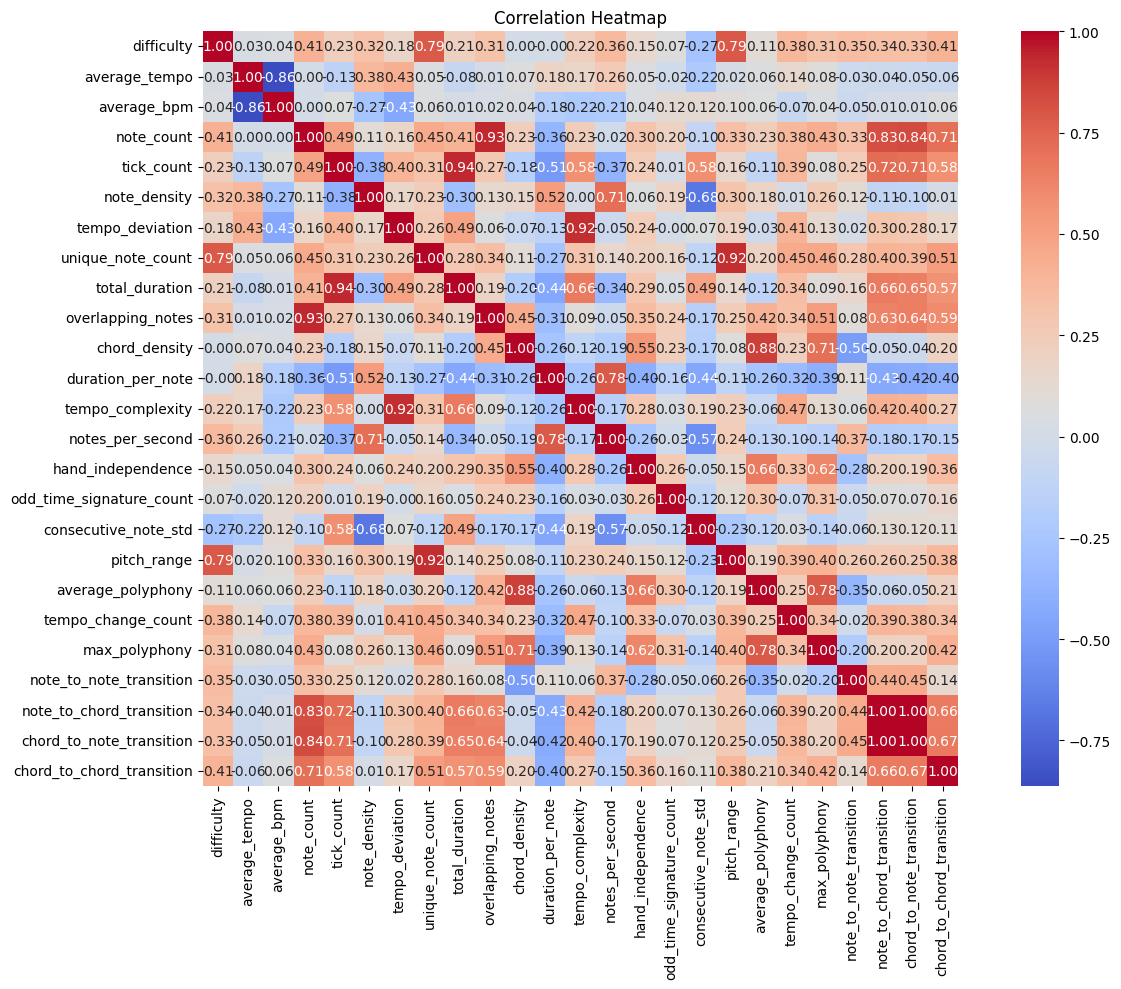

In [104]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##  Get distribution of difficulty

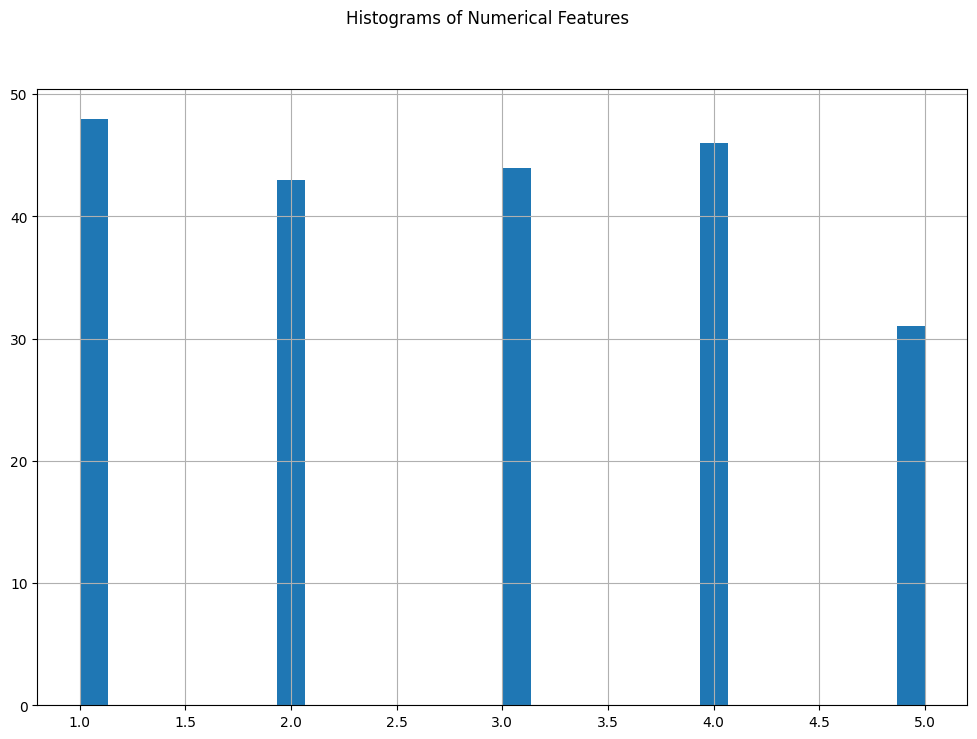

In [105]:
df['difficulty'].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

## Graph  features with highest correlation against difficulty

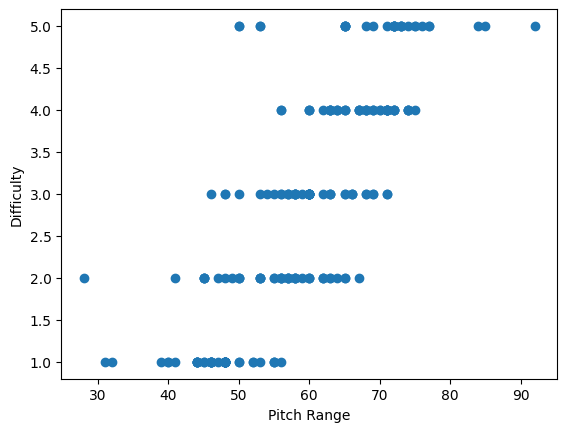

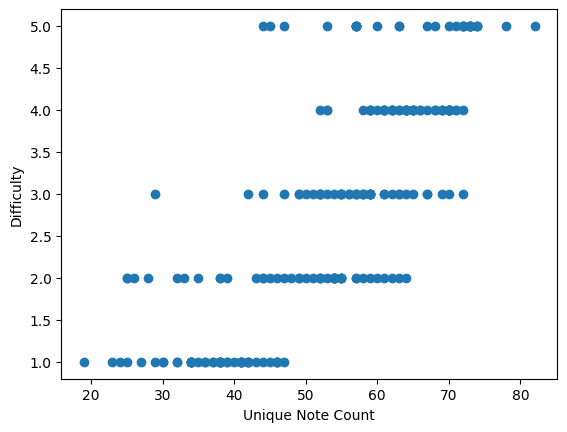

In [106]:
fig,ax = plt.subplots()
ax.scatter(y = df['difficulty'], x = df['pitch_range'])
plt.ylabel('Difficulty')
plt.xlabel('Pitch Range')
plt.show()

fig,ax  = plt.subplots()
ax.scatter(y = df['difficulty'], x = df['unique_note_count'])
plt.ylabel('Difficulty')
plt.xlabel('Unique Note Count')
plt.show()

### Deleting outliers

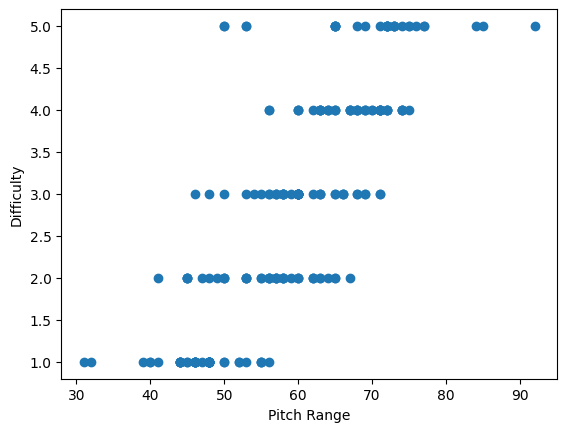

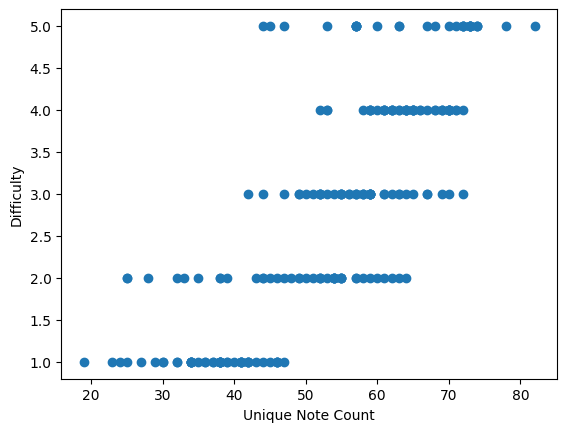

In [107]:
df = df.drop(df[(df['pitch_range'] < 40) & (df['difficulty'] == 2)].index)
df = df.drop(df[(df['unique_note_count'] < 30) & (df['difficulty'] == 3)].index)

# Graph again

fig,ax = plt.subplots()
ax.scatter(y = df['difficulty'], x = df['pitch_range'])
plt.ylabel('Difficulty')
plt.xlabel('Pitch Range')
plt.show()

fig,ax  = plt.subplots()
ax.scatter(y = df['difficulty'], x = df['unique_note_count'])
plt.ylabel('Difficulty')
plt.xlabel('Unique Note Count')
plt.show()

## Get skewed variables

indicates that the data has large outliers

In [112]:

# Check the skew of all numerical features
skewed_feats = df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'skew' : skewed_feats})
skewness.head(10)


Skew in numerical features: 



,skew
odd_time_signature_count,2.495429
duration_per_note,1.928761
note_density,1.915442
average_tempo,1.281974
tempo_complexity,1.210586
average_polyphony,0.800469
notes_per_second,0.758855
consecutive_note_std,0.722000
max_polyphony,0.615036
total_duration,0.545122


In [113]:
skewness = skewness[abs(skewness['skew']) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feature in skewed_features:
    #all_data[feat] += 1
    df[feature] = boxcox1p(df[feature], lam)

df.head()

There are 7 skewed numerical features to Box Cox transform


,difficulty,average_tempo,average_bpm,note_count,tick_count,note_density,tempo_deviation,unique_note_count,total_duration,overlapping_notes,...,odd_time_signature_count,consecutive_note_std,pitch_range,average_polyphony,tempo_change_count,max_polyphony,note_to_note_transition,note_to_chord_transition,chord_to_note_transition,chord_to_chord_transition
0,4,4.957707,145.208862,16.156583,33.371487,0.023120,30.669093,65,33.371487,8.889640,...,0.571575,43.313047,67.0,0.600167,3.858807,4,26.213605,15.000964,15.393094,9.748342
1,5,5.068950,100.000000,16.401755,24.364535,0.124208,0.000000,57,24.364535,8.385498,...,0.000000,7.385267,65.0,0.592491,0.730463,3,25.054806,10.993232,11.147538,3.820830
2,5,5.068950,100.000000,16.401755,24.364535,0.124208,0.000000,57,24.364535,8.385498,...,0.000000,7.385267,65.0,0.592491,0.730463,3,25.054806,10.993232,11.147538,3.820830
3,5,4.908963,171.028716,15.110798,33.240272,0.017370,20.297289,73,40.350294,12.983318,...,0.000000,70.806104,77.0,0.863255,7.247551,6,17.664347,12.803044,12.860162,0.000000
4,5,4.977612,135.826484,16.075258,23.369709,0.138542,18.677947,63,26.409997,13.383657,...,0.000000,15.330321,71.0,0.784637,5.995517,4,8.631303,15.834257,15.806424,16.187203


## Graphing all data against difficulty

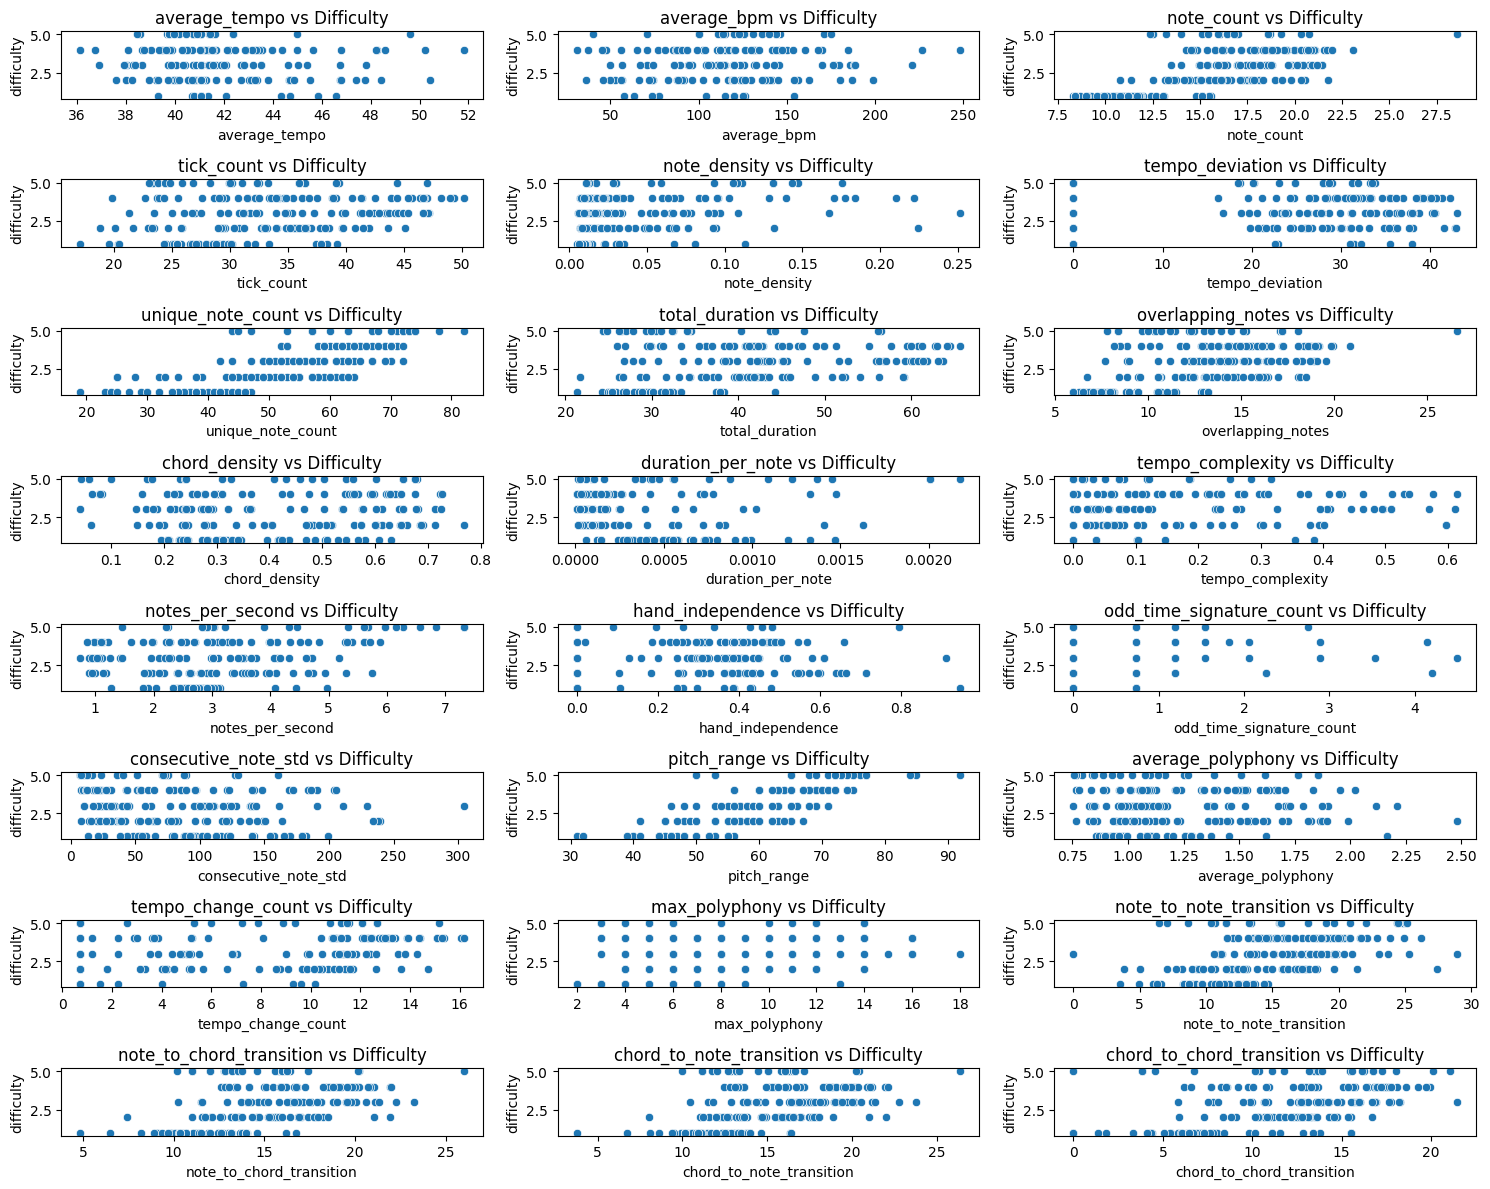

In [110]:
features = df.drop(columns=['difficulty']).columns

# Create subplots
num_features = len(features)
cols = 3
rows = (num_features + cols - 1) // cols

plt.figure(figsize=(15, 12))
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(data=df, x=feature, y='difficulty')
    plt.title(f'{feature} vs Difficulty')
    plt.tight_layout()

plt.show()

## Extract processed data to a new csv

In [111]:
df.to_csv('processed.csv', index=False)